In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [298]:
# Chargement des données
ins_prof_dut = pd.read_csv("../csv/fr-esr-insertion_professionnelle-dut_donnees_nationales.csv", sep=";")
ins_prof_lp = pd.read_csv("../csv//fr-esr-insertion_professionnelle-lp_donnees_nationales.csv", sep=";")
ins_prof_master = pd.read_csv("../csv/fr-esr-insertion_professionnelle-master_donnees_nationales.csv", sep=";")

In [299]:
# Agrégation de toutes les formations (DUT, LP, MASTER)
ins_prof = pd.concat([ins_prof_dut, ins_prof_lp, ins_prof_master], keys=["D", "L", "M"])

In [300]:
ins_prof.head()

Année Diplôme                 situation             Genre  \
D 0  2013     DUT  30 mois après le diplôme            hommes   
  1  2017     DUT  18 mois après le diplôme  femmes et hommes   
  2  2017     DUT  18 mois après le diplôme            hommes   
  3  2017     DUT  18 mois après le diplôme  femmes et hommes   
  4  2017     DUT  18 mois après le diplôme            femmes   

                                           Disciplines Code du domaine  \
D 0  Droit, économie et gestion>Droit>Carrières jur...             DEG   
  1  Sciences, technologies et santé>Informatique>I...             STS   
  2  Sciences, technologies et santé>Informatique>I...             STS   
  3  Sciences humaines et sociales>Information comm...             SHS   
  4  Sciences humaines et sociales>Information comm...             SHS   

                             Domaine Code de la discipline  \
D 0       Droit, économie et gestion                disc02   
  1  Sciences, technologies et santé                disc16   
  2  Sciences, technologies et santé                disc16   
  3    Sciences humaines et sociales                disc10   
  4    Sciences humaines et sociales                disc10   

                    Discipline Sigle  ... Secteur disciplinaire  \
D 0                      Droit   NaN  ...                   NaN   
  1               Informatique   NaN  ...                   NaN   
  2               Informatique   NaN  ...                   NaN   
  3  Information communication   NaN  ...                   NaN   
  4  Information communication   NaN  ...                   NaN   

     Administration publique (hors ens.)  \
D 0                                  NaN   
  1                                  NaN   
  2                                  NaN   
  3                                  NaN   
  4                                  NaN   

    Prof. libérale, indépendant, chef d’entreprise  \
D 0                                            NaN   
  1                                            NaN   
  2                                            NaN   
  3                                            NaN   
  4                                            NaN   

    Contrat de professionnalisation  \
D 0                             NaN   
  1                             NaN   
  2                             NaN   
  3                             NaN   
  4                             NaN   

    La fonction publique (d'etat, territoriale ou hospitalière)  \
D 0                                                NaN            
  1                                                NaN            
  2                                                NaN            
  3                                                NaN            
  4                                                NaN            

    Organisation internationale ou une institution de l'Union européenne  \
D 0                                                NaN                     
  1                                                NaN                     
  2                                                NaN                     
  3                                                NaN                     
  4                                                NaN                     

    Société d'économie mixte Agriculture, sylviculture et pêche  \
D 0                      NaN                                NaN   
  1                      NaN                                NaN   
  2                      NaN                                NaN   
  3                      NaN                                NaN   
  4                      NaN                                NaN   

    Artisan, commerçant, chef d'entreprise  \
D 0                                    NaN   
  1                                    NaN   
  2                                    NaN   
  3                                    NaN   
  4                                    NaN   

    Ingénieur, cadre, prof.

In [301]:
ins_prof.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5920 entries, ('D', 0) to ('M', 2924)
Data columns (total 86 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  5920 non-null   object 
 1   Diplôme                                                                5920 non-null   object 
 2   situation                                                              5920 non-null   object 
 3   Genre                                                                  5920 non-null   object 
 4   Disciplines                                                            5920 non-null   object 
 5   Code du domaine                                                        5920 non-null   object 
 6   Domaine                                                                592

In [302]:
ins_prof.reset_index(inplace=True)

In [303]:
ins_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 88 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   level_0                                                                5920 non-null   object 
 1   level_1                                                                5920 non-null   int64  
 2   Année                                                                  5920 non-null   object 
 3   Diplôme                                                                5920 non-null   object 
 4   situation                                                              5920 non-null   object 
 5   Genre                                                                  5920 non-null   object 
 6   Disciplines                                                            5920 non-null   o

In [304]:
ins_prof.drop("level_1", axis=1, inplace=True)
ins_prof.rename(columns={"level_0": "label"}, inplace=True)

In [305]:
ins_prof["Diplôme"].unique()

array(['DUT', 'LICENCE PRO', 'MASTER LMD', 'MASTER ENS'], dtype=object)

In [306]:
ins_prof.head()

,label,Année,Diplôme,situation,Genre,Disciplines,Code du domaine,Domaine,Code de la discipline,Discipline,...,Secteur disciplinaire,Administration publique (hors ens.),"Prof. libérale, indépendant, chef d’entreprise",Contrat de professionnalisation,"La fonction publique (d'etat, territoriale ou hospitalière)",Organisation internationale ou une institution de l'Union européenne,Société d'économie mixte,"Agriculture, sylviculture et pêche","Artisan, commerçant, chef d'entreprise","Ingénieur, cadre, prof. libérales, prof. intellectuelles sup"
0,D,2013,DUT,30 mois après le diplôme,hommes,"Droit, économie et gestion>Droit>Carrières jur...",DEG,"Droit, économie et gestion",disc02,Droit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D,2017,DUT,18 mois après le diplôme,femmes et hommes,"Sciences, technologies et santé>Informatique>I...",STS,"Sciences, technologies et santé",disc16,Informatique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D,2017,DUT,18 mois après le diplôme,hommes,"Sciences, technologies et santé>Informatique>I...",STS,"Sciences, technologies et santé",disc16,Informatique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,2017,DUT,18 mois après le diplôme,femmes et hommes,Sciences humaines et sociales>Information comm...,SHS,Sciences humaines et sociales,disc10,Information communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D,2017,DUT,18 mois après le diplôme,femmes,Sciences humaines et sociales>Information comm...,SHS,Sciences humaines et sociales,disc10,Information communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
# Liste des codes du domaine des diplômes
ins_prof["Code du domaine"].unique()

array(['DEG', 'STS', 'SHS', 'ALL', 'LLA', 'MEEF'], dtype=object)

In [308]:
# Délais d'insertion après diplôme
ins_prof["situation"].unique()

array(['30 mois après le diplôme', '18 mois après le diplôme'],
      dtype=object)

In [309]:
# Sélection des variables correspondant aux métiers
df_metier = ins_prof.iloc[:, 32:89]

In [310]:
# Ajout de l'indication de l'année
df = ins_prof[["Année", "label", "Diplôme"]].join(df_metier)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 58 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Année                                                                  5920 non-null   object
 1   label                                                                  5920 non-null   object
 2   Diplôme                                                                5920 non-null   object
 3   Fonctionnaire                                                          1502 non-null   object
 4   CDI                                                                    1502 non-null   object
 5   CDI de chantier ou CDI de mission                                      1079 non-null   object
 6   Contrat spécifique au doctorat                                         183 non-null    object
 7

In [312]:
# Suppression des lignes dont toutes valeurs des variables sont manquantes
df.dropna(subset=df.columns[1:], how='all', inplace=True)

In [313]:
#
#metier = df.melt(id_vars=["Année", "label", "Diplôme"], var_name="contrat", value_name="nb") 

In [314]:
# Sélection des types de contrats
df_contrat = df.iloc[:, 1:15]

In [315]:
# Recherche des valeurs représentant l'année
df['Année'].unique()

array(['2013', '2017', '2014', '2019', "'2019", '2015', '2016', "'2013",
       "'2014", "'2015", "'2017", "'2016", '2018', "'2018", 2013, 2014,
       2012, 2011, 2019, 2016, 2015, 2018, 2017], dtype=object)

In [316]:
# Extraction des années
years = df['Année'].astype(str).str.extract(r"([0-9]{4})", expand=True)

In [317]:
years

,0
0,2013
1,2017
2,2017
3,2017
4,2017
...,...
5915,2013
5916,2019
5917,2015
5918,2015


In [318]:
# Renommage de la colonne des années
years = years.rename(columns={0: "Année"})
# ajout de la colonne des années à la DataFrame stockant les contrats
df_contrat = years.join(df_contrat)
# Changement de type en integer de la colonne des années
df_contrat["Année"] = df_contrat["Année"].astype(int)

In [319]:
df_contrat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Année                                       5920 non-null   int64 
 1   label                                       5920 non-null   object
 2   Diplôme                                     5920 non-null   object
 3   Fonctionnaire                               1502 non-null   object
 4   CDI                                         1502 non-null   object
 5   CDI de chantier ou CDI de mission           1079 non-null   object
 6   Contrat spécifique au doctorat              183 non-null    object
 7   CDD                                         1502 non-null   object
 8   Vacataire                                   1502 non-null   object
 9   Intérimaire                                 1502 non-null   object
 10  Intermittent du spectacl

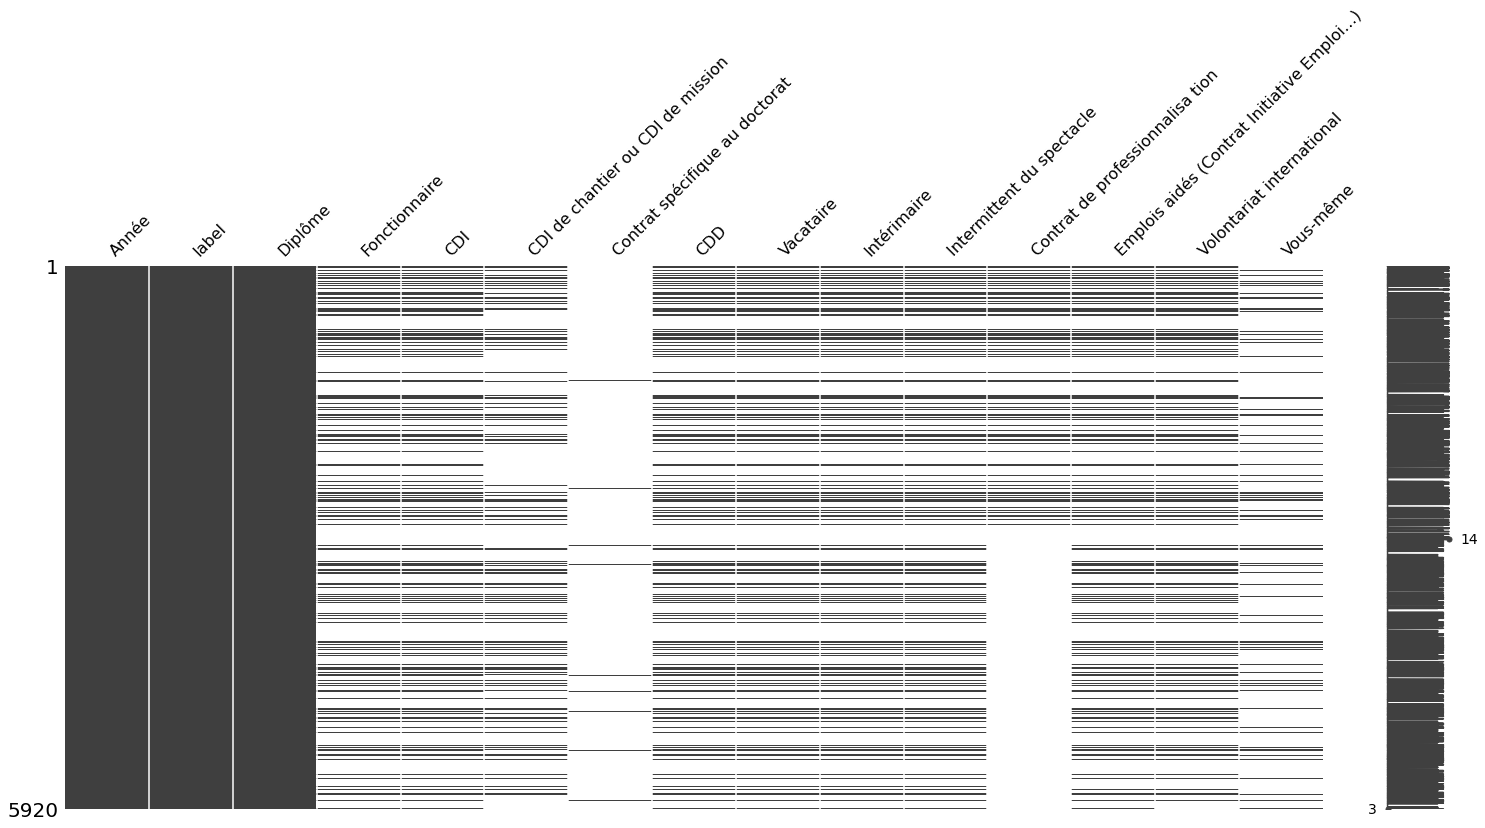

In [320]:
# Recherche des valeurs manquantes par type de contrats
msno.matrix(df_contrat)
plt.show()

In [321]:
# Remplacement des valeurs maquantes par la valeur 0
df_contrat = df_contrat.replace([pd.NA, "ns", "nd"], 0)

In [322]:
df_contrat.head()

,Année,label,Diplôme,Fonctionnaire,CDI,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,CDD,Vacataire,Intérimaire,Intermittent du spectacle,Contrat de professionnalisa tion,Emplois aidés (Contrat Initiative Emploi…),Volontariat international,Vous-même
0,2013,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
1,2017,D,DUT,2,78,0,0,14,0,2,0,3,0,1,0
2,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0


In [323]:
# Changement de type de variable
val = df_contrat[df_contrat.columns[3:]].astype(int)
df_contrat = df_contrat[["Année", "label", "Diplôme"]].join(val)

In [324]:
df_contrat

,Année,label,Diplôme,Fonctionnaire,CDI,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,CDD,Vacataire,Intérimaire,Intermittent du spectacle,Contrat de professionnalisa tion,Emplois aidés (Contrat Initiative Emploi…),Volontariat international,Vous-même
0,2013,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
1,2017,D,DUT,2,78,0,0,14,0,2,0,3,0,1,0
2,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,2013,M,MASTER ENS,0,0,0,0,0,0,0,0,0,0,0,0
5916,2019,M,MASTER ENS,76,8,0,0,14,1,0,0,0,0,0,1
5917,2015,M,MASTER ENS,0,0,0,0,0,0,0,0,0,0,0,0
5918,2015,M,MASTER ENS,0,0,0,0,0,0,0,0,0,0,0,0


In [325]:
# Calcul du nombre de chacun des contrats par année
contrat_count = df_contrat.groupby(["Année", "label", "Diplôme"]).sum()
#contrat_count.reset_index(inplace=True)

In [326]:
contrat_count.head()

Fonctionnaire   CDI  \
Année label Diplôme                           
2011  M     MASTER ENS              0     0   
            MASTER LMD              0     0   
2012  M     MASTER ENS              0     0   
            MASTER LMD              0     0   
2013  D     DUT                   117  1286   

                        CDI de chantier ou CDI de mission  \
Année label Diplôme                                         
2011  M     MASTER ENS                                  0   
            MASTER LMD                                  0   
2012  M     MASTER ENS                                  0   
            MASTER LMD                                  0   
2013  D     DUT                                         0   

                        Contrat spécifique au doctorat  CDD  Vacataire  \
Année label Diplôme                                                      
2011  M     MASTER ENS                               0    0          0   
            MASTER LMD                               0    0          0   
2012  M     MASTER ENS                               0    0          0   
            MASTER LMD                               0    0          0   
2013  D     DUT                                      0  597         13   

                        Intérimaire  Intermittent du spectacle  \
Année label Diplôme                                              
2011  M     MASTER ENS            0                          0   
            MASTER LMD            0                          0   
2012  M     MASTER ENS            0                          0   
            MASTER LMD            0                          0   
2013  D     DUT                 122                          6   

                        Contrat de professionnalisa tion  \
Année label Diplôme                                        
2011  M     MASTER ENS                                 0   
            MASTER LMD                                 0   
2012  M     MASTER ENS                                 0   
            MASTER LMD                                 0   
2013  D     DUT                                       23   

                        Emplois aidés (Contrat Initiative Emploi…)  \
Année label Diplôme                                                  
2011  M     MASTER ENS                                           0   
            MASTER LMD                                           0   
2012  M     MASTER ENS                                           0   
            MASTER LMD                                           0   
2013  D     DUT                                                 48   

                        Volontariat international  Vous-même  
Année label Diplôme                                           
2011  M     MASTER ENS                          0          0  
            MASTER LMD                          0          0  
2012  M     MASTER ENS                          0          0  
            MASTER LMD                          0          0  
2013  D     DUT                                 2         40

In [327]:
# total du nombre de contrat par année et par diplôme
contrat_count["total"] = contrat_count.sum(axis=1)

In [328]:
contrat_count.reset_index(inplace=True)

In [329]:
df_contrat = contrat_count.melt(id_vars=["Année", "label", "Diplôme", "total"], value_vars=contrat_count.columns, var_name="contrat", value_name="nb")

In [330]:
# Pourcentage d'insertion pour chaque type de contrat par année
df_contrat["%"] = (round(df_contrat["nb"] / df_contrat["total"] * 100, 1)).fillna(0)

In [331]:
df_contrat

,Année,label,Diplôme,total,contrat,nb,%
0,2011,M,MASTER ENS,0,Fonctionnaire,0,0.0
1,2011,M,MASTER LMD,0,Fonctionnaire,0,0.0
2,2012,M,MASTER ENS,0,Fonctionnaire,0,0.0
3,2012,M,MASTER LMD,0,Fonctionnaire,0,0.0
4,2013,D,DUT,2254,Fonctionnaire,117,5.2
...,...,...,...,...,...,...,...
367,2018,M,MASTER LMD,8721,Vous-même,150,1.7
368,2019,D,DUT,10869,Vous-même,271,2.5
369,2019,L,LICENCE PRO,18506,Vous-même,479,2.6
370,2019,M,MASTER ENS,597,Vous-même,3,0.5


In [332]:
df_contrat = df_contrat.pivot_table(index=["Année", "Diplôme"], columns="contrat", values="%")

In [333]:
df_contrat.head()

contrat            CDD   CDI  CDI de chantier ou CDI de mission  \
Année Diplôme                                                     
2011  MASTER ENS   0.0   0.0                                0.0   
      MASTER LMD   0.0   0.0                                0.0   
2012  MASTER ENS   0.0   0.0                                0.0   
      MASTER LMD   0.0   0.0                                0.0   
2013  DUT         26.5  57.1                                0.0   

contrat           Contrat de professionnalisa tion  \
Année Diplôme                                        
2011  MASTER ENS                               0.0   
      MASTER LMD                               0.0   
2012  MASTER ENS                               0.0   
      MASTER LMD                               0.0   
2013  DUT                                      1.0   

contrat           Contrat spécifique au doctorat  \
Année Diplôme                                      
2011  MASTER ENS                             0.0   
      MASTER LMD                             0.0   
2012  MASTER ENS                             0.0   
      MASTER LMD                             0.0   
2013  DUT                                    0.0   

contrat           Emplois aidés (Contrat Initiative Emploi…)  Fonctionnaire  \
Année Diplôme                                                                 
2011  MASTER ENS                                         0.0            0.0   
      MASTER LMD                                         0.0            0.0   
2012  MASTER ENS                                         0.0            0.0   
      MASTER LMD                                         0.0            0.0   
2013  DUT                                                2.1            5.2   

contrat           Intermittent du spectacle  Intérimaire  Vacataire  \
Année Diplôme                                                         
2011  MASTER ENS                        0.0          0.0        0.0   
      MASTER LMD                        0.0          0.0        0.0   
2012  MASTER ENS                        0.0          0.0        0.0   
      MASTER LMD                        0.0          0.0        0.0   
2013  DUT                               0.3          5.4        0.6   

contrat           Volontariat international  Vous-même  
Année Diplôme                                           
2011  MASTER ENS                        0.0        0.0  
      MASTER LMD                        0.0        0.0  
2012  MASTER ENS                        0.0        0.0  
      MASTER LMD                        0.0        0.0  
2013  DUT                               0.1        1.8

In [334]:
# Réordonnencement des types de contrat selon leur nombre maximal afin de créer un stackplot par aire croissante selon les variables
df_contrat.max().sort_values()

contrat
Contrat spécifique au doctorat                 0.0
Vacataire                                      1.3
Intermittent du spectacle                      1.5
Volontariat international                      1.5
Contrat de professionnalisa tion               2.0
Vous-même                                      2.6
Emplois aidés (Contrat Initiative Emploi…)     2.8
CDI de chantier ou CDI de mission              6.4
Intérimaire                                    6.7
CDD                                           29.9
CDI                                           65.7
Fonctionnaire                                 87.0
dtype: float64

In [335]:
# Réordonnencement des types de contrat selon leur nombre maximal 
labels = df_contrat.max().sort_values().index.to_list()

In [336]:
labels

['Contrat spécifique au doctorat',
 'Vacataire',
 'Intermittent du spectacle',
 'Volontariat international',
 'Contrat de professionnalisa tion',
 'Vous-même',
 'Emplois aidés (Contrat Initiative Emploi…)',
 'CDI de chantier ou CDI de mission',
 'Intérimaire',
 'CDD',
 'CDI',
 'Fonctionnaire']

In [337]:
# initialisation de l'axe des abscisses correspondant aux années
x = df_contrat.index.get_level_values(0).to_list()

In [342]:
# Nombre de contrats en ordonnée classés par type
y = df_contrat[labels].to_dict("list").values()

In [ ]:
#
df_contrat.plot(x="Année", y=y, kind="bar")

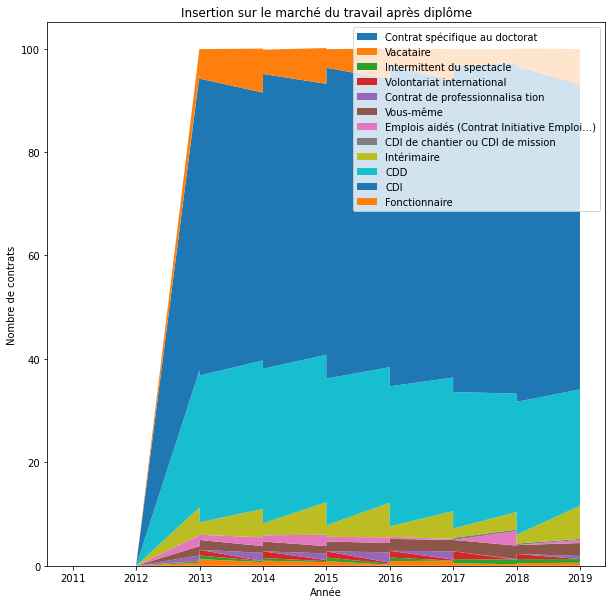

In [ ]:
# Création du stackplot
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x, y, labels=labels)
ax.legend()
plt.xlabel("Année")
plt.ylabel("Nombre de contrats")
plt.title("Insertion sur le marché du travail après diplôme")
#plt.savefig("../graph/stack_contrats.png")
plt.show()